In [18]:
path = "./data/play_tennis.csv"

In [19]:
# Necessary Imports
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [20]:
# Helper Function
# Initial plotting function
def plot_function(function, inputs, title=None, ylabel=None):
    fig, ax = plt.subplots()
    ax.plot(inputs, function(inputs))
    if title:
        ax.set_title(title)
    ax.set_xticks(np.linspace(0, 1, 11))
    ax.set_xlabel("Probability of $x$")
    if ylabel:
        ax.set_ylabel(ylabel)
    plt.show()


# Instructions and Requirements:
## Instructions:
*   This week students will have assignments,as describe in the presentations (Please be advised assignments will be graded).
*   Goal is to make students friendly with Decision Tree algorithms,Random Forests, and also show case the hyper-parameter tuning.
*   Please find the datasets in the google drive folders
## Requirements:
    *   Notebook Environment(Juopyter or Google Colab)
    *   Students are expected to have following datasets:
    *   



#Week 3 Outline
*   Gentle Introduction to ID3 Algorithm:
  *   Calculate Entropy 
  *   Calculate Information Gain
*   Gentle Introduction to Decision Tree and Random Forest
  *   Implement RandomForest using SKlearn
  *   Perform Cross-validation
  *   Comparative analysis with and without hyper-parameter tuning
  *   List item





##Information Content
The _Shannon information_ or _information content_ is a measure of how surprising an event is. It is given by the following formula
$$ I(x) = \log_2 \frac{1}{P(\boldsymbol x=x)}\ = - \log_2 P(\boldsymbol x=x) $$
Mathematically we see that something that is completely certain ($P(\boldsymbol x=x)=1$) has no new information in it at all ($I(x)=0$). According to the definition, the more unlikely an event is, the more information it contains. The Shannon information is therefore also known as the _surprisal_.


### Task-I:
Implement a function,"information_content", to compute the information content in bits i.e. use log with base 2 based on above formula, given the probability$'p(x)'$ of an event.
  *   _Hint:_<br/>
  *   The log base 2 can be acessed through np.log2. 



In [68]:
def information_content(p_x):
    """ Paramters:
    p_x: probability of an event x
    returns: Information content I 
    """
    for i in p_x:
        if i == 0:
            continue
  ### Begin Solution
  # remove the coment from I
    I = -1 * (i * np.log2(p_x))  
    return I
  ### End Solution

In [69]:
# Function Test or Sanity Check
assert information_content(0.5 ) == 1, "Danger Alert"

TypeError: 'float' object is not iterable

Remember the plot of surprisal vs probability from lecture:
  *   Let's Replicate the plot we saw in classroom:


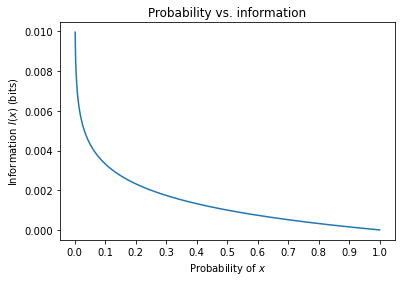

In [70]:
# The code below plots a graph of the surprisal as a function the event probability:
p_x = np.linspace(1, 0, 1001, endpoint=False)[1:] # Probabilities on (0, 1)
plot_function(information_content, p_x, title="Probability vs. information", ylabel="Information $I(x)$ (bits)")

## Entropy and Informaton Gain
*   Entropy:
Entropy is a measure of the amount of uncertainty in the dataset S. Its mathematical Representation:
\begin{align}
        \mathbf{Entropy = H(X)} = \bf{-} [\sum_{i=1}^{\infty} p_i log_2 p_i ]
    \end{align}
  *   Further simplification(For binary classes No and Yes :
  \begin{align}
        \mathbf{H(X)} = \bf{-}p(Y) *log_2 (p(Y)) - p(N) * log_2(p(N))
    \end{align}
 
*   <font color="red"> $\bf{Task -II} $ 
  *   Lets find the Entropy of Given Dataset:
      *   Find the Entropy for Whole Dataset in it's current state.
     *   Find the Emtropy for Each Attiributes of the datasets.



In [24]:
import pandas as pd
dataset = pd.read_csv(path)

In [59]:
dataset.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [27]:
# identify features and label and seperate it:
features = dataset.iloc[:, :-1]
target = dataset.iloc[:,-1:]
# sanity check
assert features.shape[0] == target.shape[0], " len(features) == len(target)"

#steps
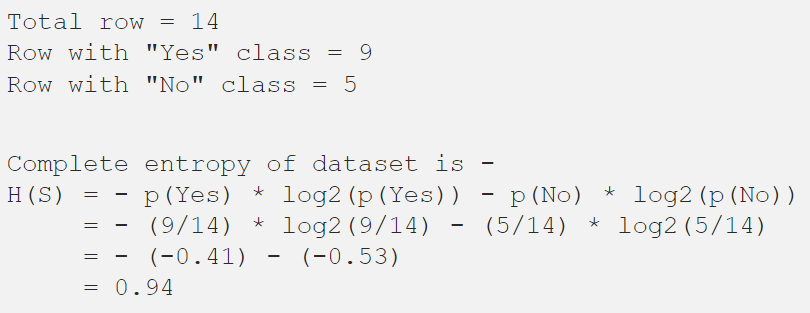

In [28]:
tot = len(dataset)
tot_n = dataset[dataset["play"] == "No"].shape[0]
tot_y = dataset[dataset["play"] == "Yes"].shape[0]
prob_y = tot_y/tot
prob_n = tot_n/tot
print(prob_y, prob_n)
H_tot = -prob_y * np.log2(prob_y) - prob_n * np.log2(prob_n)
H_tot

0.6428571428571429 0.35714285714285715


0.9402859586706311

# Steps:2
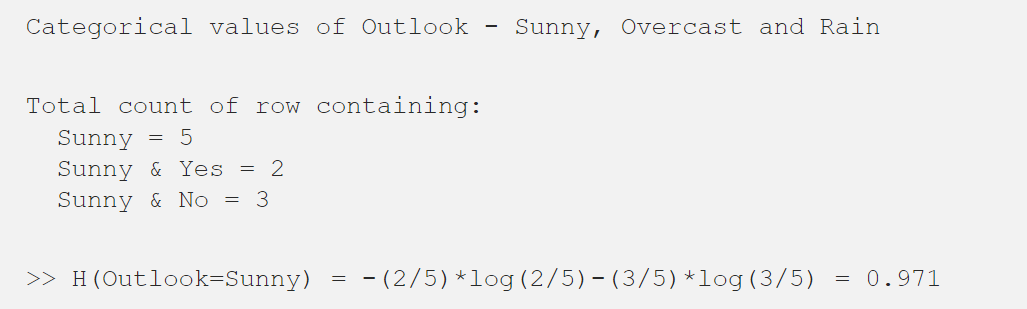

In [29]:
outlook = dataset["outlook"].unique()
sunny = dataset[dataset["outlook"] == "Sunny"]
#print(sunny.head())
tot_sunny = len(sunny)
tot_sunny_yes = sunny[sunny["play"] == "Yes"].shape[0]
tot_sunny_no = sunny[sunny["play"] == "No"].shape[0]
prob_sunny_yes = tot_sunny_yes/tot_sunny
prob_sunny_no = tot_sunny_no/tot_sunny
H_outlook_sunny = -prob_sunny_yes * np.log2(prob_sunny_yes) - prob_sunny_no * np.log2(prob_sunny_no)
print(H_outlook_sunny)

0.9709505944546686


# Find Out H(outlook=Rain) and H(outlook=overcast)
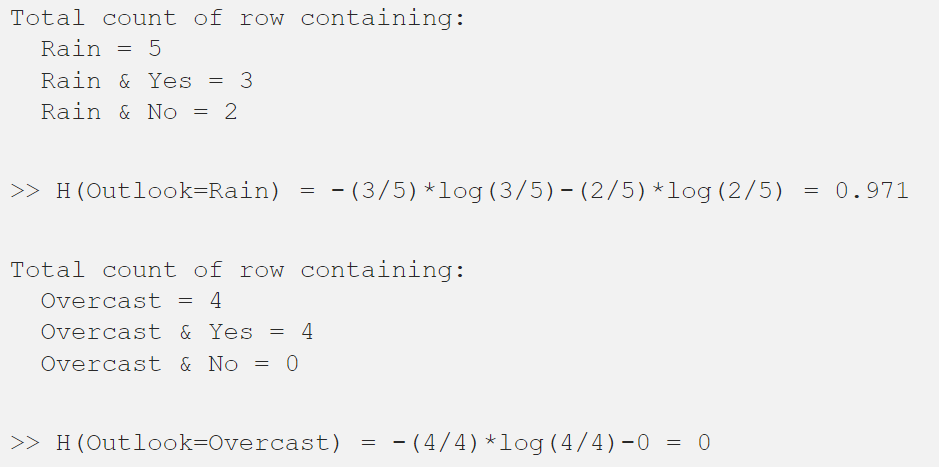

In [30]:
# Your Code Here:
rain = dataset[dataset["outlook"] == "Rain"]
#print(rain.head())
tot_rain = len(rain)
tot_rain_yes = rain[rain["play"] == "Yes"].shape[0]
tot_rain_no = rain[rain["play"] == "No"].shape[0]
prob_rain_yes = tot_rain_yes/tot_rain
prob_rain_no = tot_rain_no/tot_rain
H_outlook_rain = -prob_rain_yes * np.log2(prob_rain_yes) - prob_rain_no * np.log2(prob_rain_no)
print(H_outlook_rain)

0.9709505944546686


In [32]:
overcast = dataset[dataset["outlook"] == "Overcast"]
#print(overcast.head())
tot_overcast = len(overcast)
tot_overcast_yes = overcast[overcast["play"] == "Yes"].shape[0]
tot_overcast_no = overcast[overcast["play"] == "No"].shape[0]
prob_overcast_yes = tot_overcast_yes/tot_overcast
prob_overcast_no = tot_overcast_no/tot_overcast
prob_overcast_no = 0.000000001
H_outlook_overcast = -prob_overcast_yes * np.log2(prob_overcast_yes) - prob_overcast_no * np.log2(prob_overcast_no)
print(H_outlook_overcast)

2.9897352853986267e-08


# Step:3: 
Calculate the Total Information for attributes Outlook:
*   \begin{align}
        \mathbf{Entropy(T,X)} =  [\sum_{c=X} p(c)E(c) ]
    \end{align}

<font color="red"> $\bf{T: Current State}$ 
<font color="red"> $\bf{X: Current Attributes}$ 
  * In our example:
        *   Current State = H(play)
        *   X = Outlook
        *   I(Outlook) = p(sunny) * H(outlook=sunny) + p(Rain)*H(outlook=Rain)
        +p(Overcast) * H(outlook=Overcast)







In [41]:
# Find the solutions:
prob_sun = tot_sunny/tot
prob_rain =tot_rain/tot
prob_overcast = tot_overcast/tot
I_Outlook = prob_sun * H_outlook_sunny + prob_rain * H_outlook_rain + prob_overcast * H_outlook_overcast
I_Outlook

0.6935361474382926

# Inforamtion Gain:
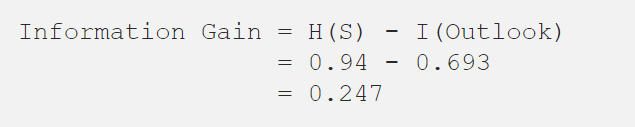

In [43]:
InformationGain_Outlook = H_tot - I_Outlook
InformationGain_Outlook

0.24674981123233852

### TEMP

In [44]:
temp = dataset["temp"].unique()

In [45]:
hot = dataset[dataset["temp"] == "Hot"]
tot_hot = len(hot)
tot_hot_yes = hot[hot["play"] == "Yes"].shape[0]
tot_hot_no = hot[hot["play"] == "No"].shape[0]
prob_hot_yes = tot_hot_yes/tot_hot
prob_hot_no = tot_hot_no/tot_hot
H_outlook_hot = -prob_hot_yes * np.log2(prob_hot_yes) - prob_hot_no * np.log2(prob_hot_no)
print(H_outlook_hot)

1.0


In [46]:
mild = dataset[dataset["temp"] == "Mild"]
tot_mild = len(mild)
tot_mild_yes = mild[mild["play"] == "Yes"].shape[0]
tot_mild_no = mild[mild["play"] == "No"].shape[0]
prob_mild_yes = tot_mild_yes/tot_mild
prob_mild_no = tot_mild_no/tot_mild
H_outlook_mild = -prob_mild_yes * np.log2(prob_mild_yes) - prob_mild_no * np.log2(prob_mild_no)
print(H_outlook_mild)

0.9182958340544896


In [47]:
cool = dataset[dataset["temp"] == "Cool"]
tot_cool = len(cool)
tot_cool_yes = cool[cool["play"] == "Yes"].shape[0]
tot_cool_no = cool[cool["play"] == "No"].shape[0]
prob_cool_yes = tot_cool_yes/tot_cool
prob_cool_no = tot_cool_no/tot_cool
H_outlook_cool = -prob_cool_yes * np.log2(prob_cool_yes) - prob_cool_no * np.log2(prob_cool_no)
print(H_outlook_cool)

0.8112781244591328


In [48]:
prob_hot = tot_hot/tot
prob_mild =tot_mild/tot
prob_cool = tot_cool/tot
I_Temp = prob_hot * H_outlook_hot + prob_mild * H_outlook_mild + prob_cool * H_outlook_cool
I_Temp

0.9110633930116763

In [49]:
InformationGain_Temp = H_tot - I_Temp
InformationGain_Temp

0.02922256565895487

### Humidity


In [50]:
humidity = dataset["humidity"].unique()

In [54]:
normal = dataset[dataset["humidity"] == "Normal"]
tot_normal = len(normal)
tot_normal_yes = normal[normal["play"] == "Yes"].shape[0]
tot_normal_no = normal[normal["play"] == "No"].shape[0]
prob_normal_yes = tot_normal_yes/tot_normal
prob_normal_no = tot_normal_no/tot_normal
H_outlook_normal = -prob_normal_yes * np.log2(prob_normal_yes) - prob_normal_no * np.log2(prob_normal_no)
print(H_outlook_normal)

0.5916727785823275


In [55]:
high = dataset[dataset["humidity"] == "High"]
tot_high = len(high)
tot_high_yes = high[high["play"] == "Yes"].shape[0]
tot_high_no = high[high["play"] == "No"].shape[0]
prob_high_yes = tot_high_yes/tot_high
prob_high_no = tot_high_no/tot_high
H_outlook_high = -prob_high_yes * np.log2(prob_high_yes) - prob_high_no * np.log2(prob_high_no)
print(H_outlook_high)

0.9852281360342515


In [56]:
prob_normal = tot_normal/tot
prob_high =tot_high/tot
I_Humidity = prob_normal * H_outlook_normal + prob_high * H_outlook_high 
I_Humidity

0.7884504573082896

In [57]:
InformationGain_Humidity = H_tot - I_Humidity
InformationGain_Humidity

0.15183550136234159

### Wind

In [58]:
wind = dataset["wind"].unique()

In [60]:
weak = dataset[dataset["wind"] == "Weak"]
tot_weak = len(weak)
tot_weak_yes = weak[weak["play"] == "Yes"].shape[0]
tot_weak_no = weak[weak["play"] == "No"].shape[0]
prob_weak_yes = tot_weak_yes/tot_weak
prob_weak_no = tot_weak_no/tot_weak
H_outlook_weak = -prob_weak_yes * np.log2(prob_weak_yes) - prob_weak_no * np.log2(prob_weak_no)
print(H_outlook_weak)

0.8112781244591328


In [61]:
strong = dataset[dataset["wind"] == "Strong"]
tot_strong = len(strong)
tot_strong_yes = strong[strong["play"] == "Yes"].shape[0]
tot_strong_no = strong[strong["play"] == "No"].shape[0]
prob_strong_yes = tot_strong_yes/tot_strong
prob_strong_no = tot_strong_no/tot_strong
H_outlook_strong = -prob_strong_yes * np.log2(prob_strong_yes) - prob_strong_no * np.log2(prob_strong_no)
print(H_outlook_strong)

1.0


In [62]:
prob_weak = tot_weak/tot
prob_strong =tot_strong/tot
I_Wind = prob_weak * H_outlook_weak + prob_strong * H_outlook_strong 
I_Wind

0.8921589282623617

In [63]:
InformationGain_Wind = H_tot - I_Wind
InformationGain_Wind

0.04812703040826949

As the feature Outlook has the highest value, so it will be selected for our tree node.